## Commercial vs. Residential units

In [16]:
# Imports
import pandas as pd
import functions as fc
import matplotlib.pyplot as plt
import numpy as np

# Read input file
sales_frame = fc.read_csv("data/nyc-rolling-sales2.csv")

# Printing head of the Data Frame
#print(sales_frame.head())

# Data Types of the Data Frame pre changing
#print(sales_frame.dtypes)

# Changing format of boroughs to string (from int)
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].apply(str)
# Changing format of sale price to numeric (from str)
sales_frame["SALE PRICE"] = pd.to_numeric(sales_frame["SALE PRICE"], errors="coerce")
# Changing format of sale date to datetime (from str)
sales_frame["SALE DATE"] = pd.to_datetime(sales_frame["SALE DATE"], errors="coerce")
#Changing format of sale date to datetime (from st

# Replacing numbers of boroughs with actual name
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["1"], "Manhattan")
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["2"], "Brooklyn")
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["3"], "Queens")
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["4"], "The Bronx")
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["5"], "Staten Island")

# Printing head of the Data Frame
#print(sales_frame.head())

# Data Types of the Data Frame post changing
#print(sales_frame.dtypes)

# excluding sales that have no specifications of both "RESIDENTIAL SALES" AND "COMMERCIAL SALES"
units_not_both_zero = sales_frame[(sales_frame["RESIDENTIAL UNITS"] !=0) | (sales_frame["COMMERCIAL UNITS"] != 0)]
print(len(units_not_both_zero))

#RESIDENTIAL UND COMMERCIAL MUSS TOTAL ERGEBEN

62168


### Residential vs. Commercial by Borough

               RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS
BOROUGH                                                        
Queens                     48951              3558        52490
The Bronx                  45491              5517        50995
Manhattan                  42241              5486        47719
Brooklyn                   24225              1134        25355
Staten Island              10324               670        10987


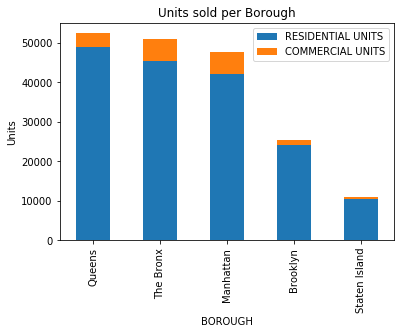

In [17]:
# grouping dataframe by borough and sum of units
units_borough = units_not_both_zero.groupby(["BOROUGH"])
units_by_borough = units_borough["RESIDENTIAL UNITS", "COMMERCIAL UNITS", "TOTAL UNITS"].sum().reset_index()
units_by_borough = units_by_borough.sort_values(["TOTAL UNITS"], ascending= [False])
units_by_borough.set_index("BOROUGH", drop=True, inplace=True)
print(units_by_borough)

# plotting stacked dataframe commercial/residential units
units_by_borough[['RESIDENTIAL UNITS','COMMERCIAL UNITS']].plot.bar(stacked=True)
plt.ylabel("Units")
plt.title("Units sold per Borough")
plt.savefig("data/Units sold per Borough.jpg", bbox_inches="tight")
plt.show()

### Top Total Units

In [18]:
# determining max, mean total units
total_max = units_not_both_zero.nlargest(100, "TOTAL UNITS")

# grouping dataframe of top 50 total unit values by borough
total_max_borough = total_max.groupby(["BOROUGH"])
total_max_by_borough = total_max_borough["TOTAL UNITS"].count().reset_index(name="VALUE COUNTS")
total_max_by_borough = total_max_by_borough.sort_values(["VALUE COUNTS"], ascending= [False])
total_max_by_borough = total_max_by_borough.reset_index(drop=True)
print(total_max_by_borough)

total_mean = units_not_both_zero["TOTAL UNITS"].mean()
print("\nTOTAL UNITS, Durchschnitt:", round(total_mean, 2))

     BOROUGH  VALUE COUNTS
0  Manhattan            50
1  The Bronx            25
2   Brooklyn            13
3     Queens            12

TOTAL UNITS, Durchschnitt: 3.02


### Top Residential Units

In [19]:
# determining max, mean residential units
res_max = units_not_both_zero.nlargest(100, "RESIDENTIAL UNITS")

# grouping dataframe of top 50 residential unit values by borough
res_max_borough = res_max.groupby(["BOROUGH"])
res_max_by_borough = res_max_borough["RESIDENTIAL UNITS"].count().reset_index(name="VALUE COUNTS")
res_max_by_borough = res_max_by_borough.sort_values(["VALUE COUNTS"], ascending= [False])
res_max_by_borough = res_max_by_borough.reset_index(drop=True)
print(res_max_by_borough)

res_mean = units_not_both_zero["RESIDENTIAL UNITS"].mean()
print("\nRESIDENTIAL UNITS, Average:", round(res_mean, 2))

         BOROUGH  VALUE COUNTS
0      Manhattan            46
1      The Bronx            24
2       Brooklyn            16
3         Queens            13
4  Staten Island             1

RESIDENTIAL UNITS, Average: 2.75


### Top Commercial Units

In [20]:
# determining max, mean commercial units
com_max = units_not_both_zero.nlargest(100, "COMMERCIAL UNITS")

# grouping dataframe of top 50 commercial unit values by borough
com_max_borough = com_max.groupby(["BOROUGH"])
com_max_by_borough = com_max_borough["COMMERCIAL UNITS"].count().reset_index(name="VALUE COUNTS")
com_max_by_borough = com_max_by_borough.sort_values(["VALUE COUNTS"], ascending= [False])
com_max_by_borough = com_max_by_borough.reset_index(drop=True)
print(com_max_by_borough)

com_mean = units_not_both_zero["COMMERCIAL UNITS"].mean()
print("\nCOMMERCIAL UNITS, Average:", round(com_mean, 2))

         BOROUGH  VALUE COUNTS
0      Manhattan            56
1      The Bronx            21
2         Queens            12
3       Brooklyn             7
4  Staten Island             4

COMMERCIAL UNITS, Average: 0.26
